#**Import Library**

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import math

from IPython.display import Image
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from datetime import timedelta, datetime

%matplotlib inline

In [2]:
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
df = pd.read_csv(dataset)
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-12-31T17:22:51.700Z,1.0439,126.5326,42.38,4.0,mb,NaN,197.0,0.876,0.98,...,2017-03-23T22:52:11.040Z,"97km WNW of Kota Ternate, Indonesia",earthquake,11.8,27.3,0.183,8.0,reviewed,us,us
1,2016-12-31T07:21:08.220Z,-6.0786,130.0318,137.85,4.6,mb,NaN,82.0,2.271,0.86,...,2017-03-23T22:52:10.040Z,"250km NW of Saumlaki, Indonesia",earthquake,8.9,8.2,0.122,20.0,reviewed,us,us
2,2016-12-30T08:24:53.620Z,-9.1767,123.5689,116.02,4.6,mb,NaN,59.0,0.897,0.89,...,2017-03-23T22:52:09.040Z,"51km NNW of Naisano Dua, Indonesia",earthquake,7.7,6.6,0.110,25.0,reviewed,us,us
3,2016-12-30T07:10:05.390Z,1.7358,126.5028,42.15,5.0,mb,NaN,92.0,1.289,0.95,...,2017-03-23T22:52:09.040Z,"142km NW of Kota Ternate, Indonesia",earthquake,7.8,7.4,0.075,57.0,reviewed,us,us
4,2016-12-30T06:41:20.480Z,-9.1597,118.7325,105.58,4.4,mb,NaN,81.0,3.502,0.64,...,2017-03-23T22:52:09.040Z,"45km SSE of Tolotangga, Indonesia",earthquake,6.7,8.6,0.134,16.0,reviewed,us,us


In [3]:
print('Total Jumlah Kejadian Gempa:',df.shape[0])
df.head()

Total Jumlah Kejadian Gempa: 54920


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-12-31T17:22:51.700Z,1.0439,126.5326,42.38,4.0,mb,NaN,197.0,0.876,0.98,...,2017-03-23T22:52:11.040Z,"97km WNW of Kota Ternate, Indonesia",earthquake,11.8,27.3,0.183,8.0,reviewed,us,us
1,2016-12-31T07:21:08.220Z,-6.0786,130.0318,137.85,4.6,mb,NaN,82.0,2.271,0.86,...,2017-03-23T22:52:10.040Z,"250km NW of Saumlaki, Indonesia",earthquake,8.9,8.2,0.122,20.0,reviewed,us,us
2,2016-12-30T08:24:53.620Z,-9.1767,123.5689,116.02,4.6,mb,NaN,59.0,0.897,0.89,...,2017-03-23T22:52:09.040Z,"51km NNW of Naisano Dua, Indonesia",earthquake,7.7,6.6,0.110,25.0,reviewed,us,us
3,2016-12-30T07:10:05.390Z,1.7358,126.5028,42.15,5.0,mb,NaN,92.0,1.289,0.95,...,2017-03-23T22:52:09.040Z,"142km NW of Kota Ternate, Indonesia",earthquake,7.8,7.4,0.075,57.0,reviewed,us,us
4,2016-12-30T06:41:20.480Z,-9.1597,118.7325,105.58,4.4,mb,NaN,81.0,3.502,0.64,...,2017-03-23T22:52:09.040Z,"45km SSE of Tolotangga, Indonesia",earthquake,6.7,8.6,0.134,16.0,reviewed,us,us


In [4]:
# daftar jenis magnitude
df['magType'].value_counts()

mb     49379
mwc     2669
mw      1867
mwb      440
ms       282
mww      227
ml        35
md        12
mwr        7
Mb         1
m          1
Name: magType, dtype: int64

In [5]:
mag_keep = np.asarray(df['magType'].value_counts().head(6).index)
mag_keep = mag_keep.astype(str)

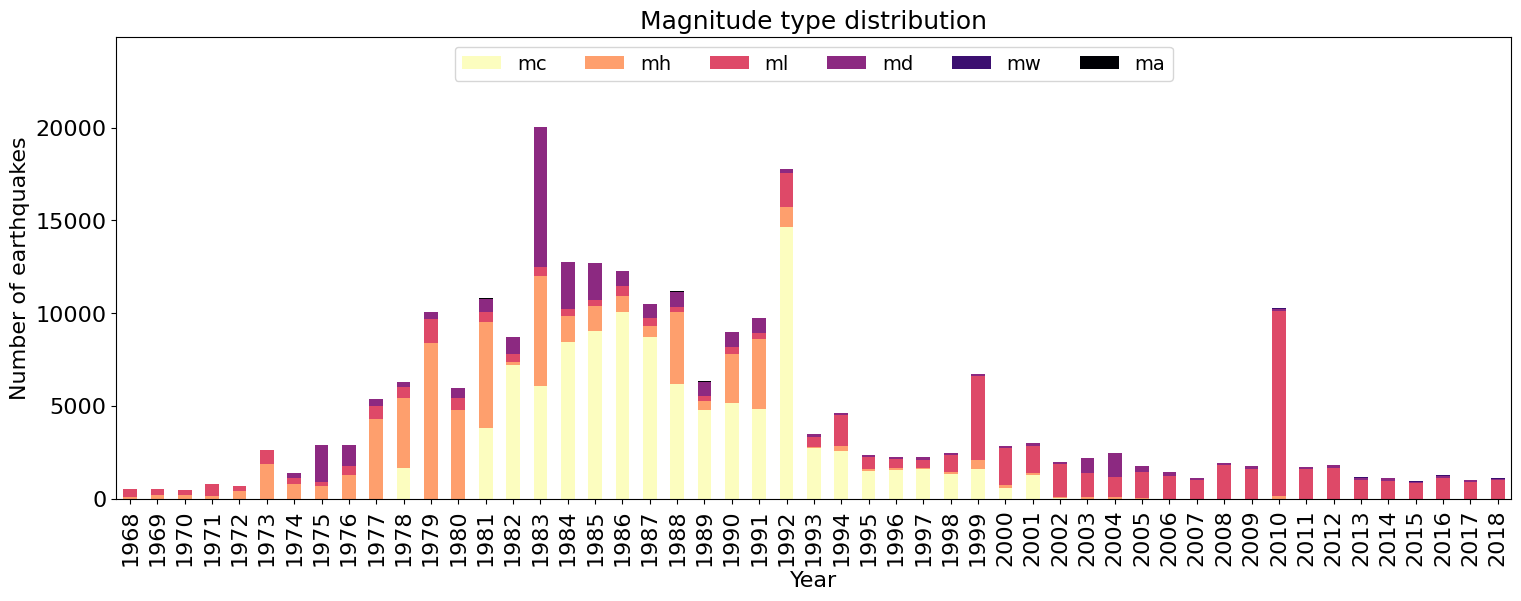

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Settings for all figures
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 14

# Load earthquake dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
df = pd.read_csv(dataset)

# Convert 'time' column to datetime format
df['dt_time'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a column for the year
df['year'] = df['dt_time'].apply(lambda x: x.year)

# Group by year and 'magType'
df_cut = df[['year', 'magType']]
df_magType = df_cut.groupby('year')['magType'].value_counts().unstack()

# Keep only the top 6 magnitude types for plotting
mag_keep = df_magType.sum().nlargest(6).index
df_magType = df_magType[mag_keep]

# Plot the DataFrame as a stacked bar chart
ax = df_magType.plot(kind='bar', stacked=True, colormap='magma_r', figsize=(18, 6))
ax.set_ylim([0, df_magType.max().max() * 1.7])  # Adjust Y-axis limit based on maximum data
ax.legend(loc='upper center', ncol=6)
plt.xlabel('Year')
plt.ylabel('Number of earthquakes')
plt.title('Magnitude type distribution')
plt.show()


In [7]:
# Cut out years 1970 - 1982
df = df[df.year > 1982]

# Print the minimum year in the column
print("Earliest year of data:",min(df['year']))

# Total number of earthquakes
N_tot = df['mag'].count()
print('Total Jumlah EQ:', N_tot)

Earliest year of data: 1983
Total Jumlah EQ: 49987


**Gutenberg–Richter law**

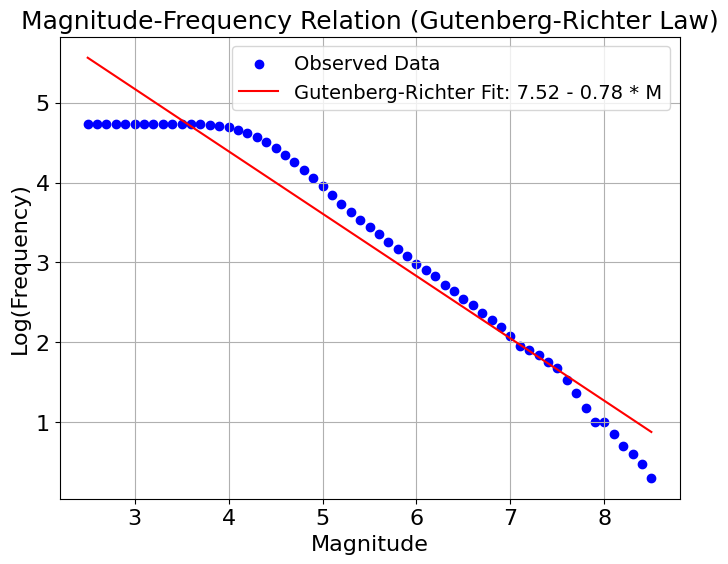

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load earthquake dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
data = pd.read_csv(dataset)

# Hapus nilai NaN atau infinitas dari kolom 'mag'
data = data.dropna(subset=['mag'])

# Hitung frekuensi kejadian gempa per rentang magnitudo
magnitudes = np.arange(2.5, 8.6, 0.1)  # Rentang magnitudo
frequency = []

for mag in magnitudes:
    count = len(data[data['mag'] >= mag])
    frequency.append(count)

# Hapus nol dari frekuensi untuk menghindari log(0)
frequency = np.array(frequency)
frequency = frequency[frequency != 0]

# Fungsi untuk regresi linear pada skala log-log (Gutenberg-Richter)
def gutenberg_richter(m, a, b):
    return a - b * m

# Perkirakan parameter a dan b untuk garis regresi
popt, pcov = curve_fit(gutenberg_richter, magnitudes[:len(frequency)], np.log10(frequency))

# Plot MFR (Magnitude-Frequency Relation) pada skala log-log dengan garis regresi
plt.figure(figsize=(8, 6))
plt.scatter(magnitudes[:len(frequency)], np.log10(frequency), color='blue', label='Observed Data')
plt.plot(magnitudes[:len(frequency)], gutenberg_richter(magnitudes[:len(frequency)], *popt), color='red', label=f'Gutenberg-Richter Fit: {popt[0]:.2f} - {popt[1]:.2f} * M')
plt.xlabel('Magnitude')
plt.ylabel('Log(Frequency)')
plt.title('Magnitude-Frequency Relation (Gutenberg-Richter Law)')
plt.legend()
plt.grid(True)
plt.show()


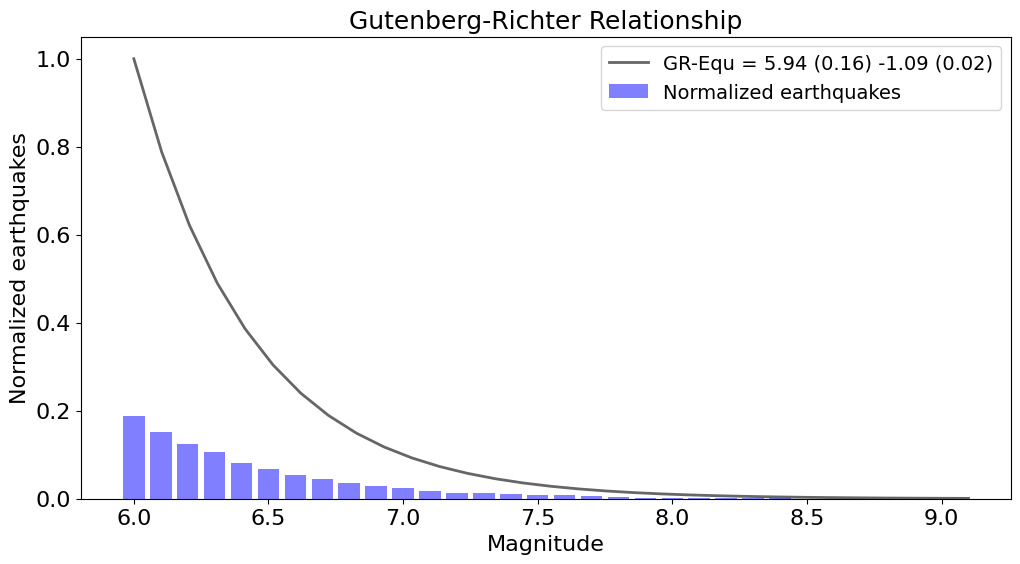

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load earthquake dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
df = pd.read_csv(dataset)

# Number of earthquakes by magnitude
mag_tot = df['mag'].value_counts()
mag_tot.sort_index(axis=0, inplace=True)

# Convert the indices of the Series to an np.ndarray
mags = np.asarray(mag_tot.index)

# Define the range of magnitudes and initialize counts
magnitudes = np.arange(6, 9.1, 0.1)
counts = np.zeros(magnitudes.shape[0])

# Compute the number of events with magnitude M >= m
for i, m in enumerate(magnitudes):
    counts[i] = df[df['mag'] >= m]['mag'].count()

# Normalize counts
norm = np.sum(counts)
counts_n = counts / norm

# Filter by removing empty data
counts_n_f = counts_n[counts_n != 0]
magnitudes_f = magnitudes[:len(counts_n_f)]  # Ensure magnitudes and counts_n have the same length

# Plot Gutenberg-Richter relationship: N = 10**(a-bM)
a = np.log10(1) + 6
M = np.linspace(6, 9.1, len(counts_n_f))  # Ensure M has the same length as counts_n_f
N = np.power(10, (a - M))

# Compute linear regression
reg = stats.linregress(magnitudes_f, np.log10(counts_n_f))

label = f'GR-Equ = {reg.intercept:.2f} ({reg.intercept_stderr:.2f}) {reg.slope:.2f} ({reg.stderr:.2f})'

plt.figure(figsize=(12, 6))
ax1 = plt.bar(magnitudes_f, counts_n_f,
              width=0.08, color='blue', alpha=0.5,
              label='Normalized earthquakes')

ax2 = plt.plot(M, N, 'k', linewidth=2, alpha=0.6,
               label=label)

plt.ylabel('Normalized earthquakes')
plt.xlabel('Magnitude')
plt.legend()
plt.title('Gutenberg-Richter Relationship')
plt.show()